In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt


In [2]:
data = pd.read_csv('D:\Moradkhani\datasets\mall_customer\Mall_Customers.csv', header = 0)

In [3]:
data.head()

,CustomerID,Gender,Age,Annual Income (k$),Spending Score (1-100)
0,1,Male,19,15,39
1,2,Male,21,15,81
2,3,Female,20,16,6
3,4,Female,23,16,77
4,5,Female,31,17,40


In [4]:
from sklearn.preprocessing import StandardScaler

In [5]:
X_num = data[['Age', 'Annual Income (k$)', 'Spending Score (1-100)']]

In [6]:
scaler = StandardScaler().fit(X_num)

In [7]:
X_num_scaled = scaler.transform(X_num)

In [8]:
np.std(X_num_scaled[:,0])

1.0

In [9]:
np.mean(X_num_scaled[:,0])

-1.021405182655144e-16

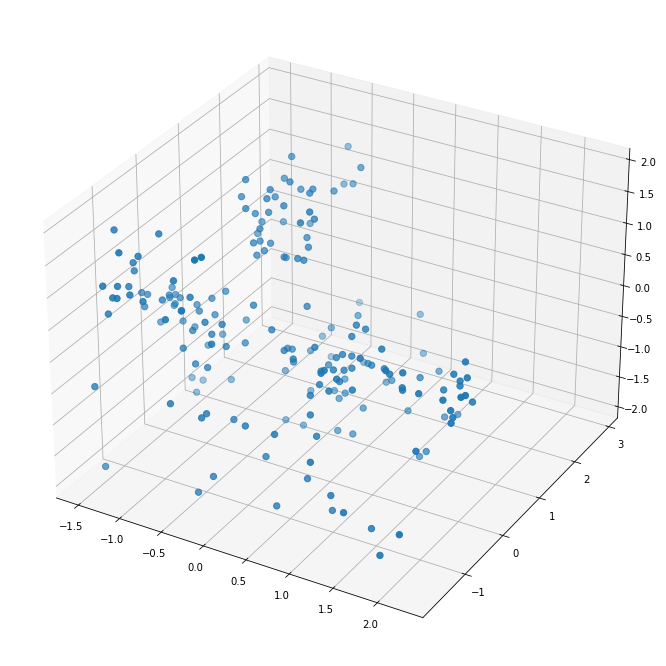

In [10]:
fig = plt.figure(figsize=(12, 12))
ax = fig.add_subplot(projection='3d')
ax.scatter(X_num_scaled[:,0], X_num_scaled[:,1], X_num_scaled[:,2], s =40)
plt.show()

In [11]:
from sklearn.decomposition import PCA

In [12]:
pca = PCA(n_components=2)

In [13]:
pca.fit(X_num_scaled)

PCA(n_components=2)

In [14]:
print(pca.explained_variance_ratio_)

[0.44266167 0.33308378]


In [15]:
print(pca.singular_values_)

[16.29714709 14.1368409 ]


In [16]:
X_num_pca = pca.transform(X_num_scaled)

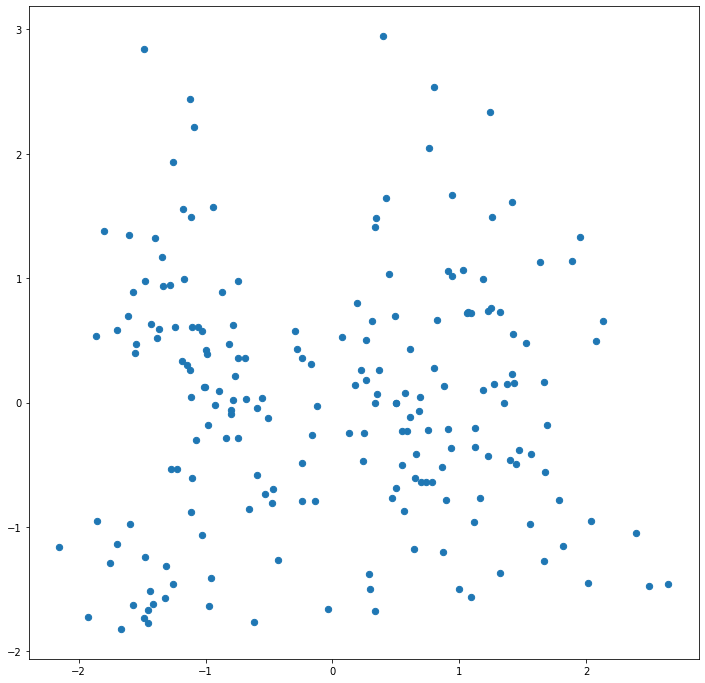

In [17]:
fig = plt.figure(figsize=(12, 12))
ax = fig.add_subplot()
ax.scatter(X_num_pca[:,0], X_num_pca[:,1], s = 40)
plt.show()

In [34]:
n_clusters = 2

In [33]:
pd.DataFrame(X_num_scaled)['Gender'] = data['Gender']

In [35]:
from sklearn.cluster import KMeans

In [36]:
kmeans = KMeans(n_clusters=n_clusters).fit(X_num_scaled)

In [37]:
kmeans_pred = kmeans.predict(X_num_scaled)

In [38]:
data['Gender']

0        Male
1        Male
2      Female
3      Female
4      Female
        ...  
195    Female
196    Female
197      Male
198      Male
199      Male
Name: Gender, Length: 200, dtype: object

In [39]:
kmeans_pred

array([1, 1, 0, 1, 1, 1, 0, 1, 0, 1, 0, 1, 0, 1, 0, 1, 0, 1, 0, 1, 0, 1,
       0, 1, 0, 1, 0, 1, 0, 1, 0, 1, 0, 1, 0, 1, 0, 1, 0, 1, 0, 1, 0, 1,
       0, 1, 0, 1, 1, 1, 0, 1, 1, 0, 0, 0, 0, 0, 1, 0, 0, 1, 0, 0, 0, 1,
       0, 0, 1, 1, 0, 0, 0, 0, 0, 1, 0, 0, 1, 0, 0, 1, 0, 0, 1, 0, 0, 1,
       1, 0, 0, 1, 0, 0, 1, 1, 0, 1, 0, 1, 1, 0, 0, 1, 0, 1, 0, 0, 0, 0,
       0, 1, 0, 1, 1, 1, 0, 0, 0, 0, 1, 0, 1, 1, 1, 1, 0, 1, 0, 1, 0, 1,
       1, 1, 0, 1, 0, 1, 0, 1, 0, 1, 1, 1, 0, 1, 0, 1, 0, 1, 0, 1, 0, 1,
       0, 1, 0, 1, 0, 1, 0, 1, 0, 1, 0, 1, 0, 1, 0, 1, 0, 1, 0, 1, 0, 1,
       0, 1, 0, 1, 0, 1, 0, 1, 0, 1, 0, 1, 0, 1, 0, 1, 0, 1, 0, 1, 0, 1,
       0, 1])

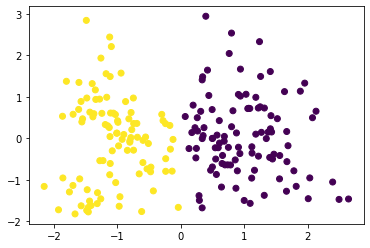

In [40]:
plt.scatter(X_num_pca[:,0], X_num_pca[:,1], c=kmeans_pred)

In [41]:
from sklearn.cluster import SpectralClustering

In [42]:
spectral_pred = SpectralClustering(n_clusters=n_clusters, affinity = 'nearest_neighbors',random_state=0, assign_labels='discretize').fit_predict(X_num_scaled)

In [43]:
spectral_pred

array([0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 1, 0, 1, 0, 1, 0, 1,
       0, 1, 0, 1, 0, 1, 0, 1, 0, 1, 0, 1, 0, 1, 0, 1, 0, 1, 0, 1, 0, 1,
       0, 1, 0, 1, 0, 1, 0, 1, 0, 1, 0, 1, 0, 1, 0, 1, 0, 1, 0, 1, 0, 1,
       0, 1, 0, 1, 0, 1, 0, 1, 0, 1, 0, 1, 0, 1, 0, 1, 0, 1, 0, 1, 0, 1,
       0, 1], dtype=int64)

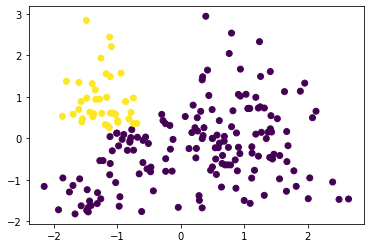

In [51]:
plt.scatter(X_num_pca[:,0], X_num_pca[:,1], c=spectral_pred)

In [57]:
data = pd.read_csv('D:\Moradkhani\datasets\path_based.txt', header = None, delimiter = "\t")

In [58]:
data

,0,1,2
0,11.25,5.05,1
1,10.95,4.70,1
2,9.85,5.80,1
3,9.80,5.75,1
4,9.15,6.80,1
...,...,...,...
295,17.50,18.05,2
296,16.65,17.50,2
297,15.45,17.30,2
298,15.45,17.80,2


In [59]:
X = data[[0,1]]

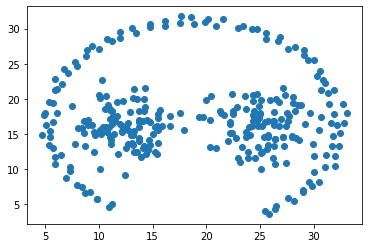

In [62]:
plt.scatter(X[0], X[1])

In [96]:
spectral_pred = SpectralClustering(n_clusters=2, affinity = 'nearest_neighbors').fit_predict(X)

In [97]:
spectral_pred

array([0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0])

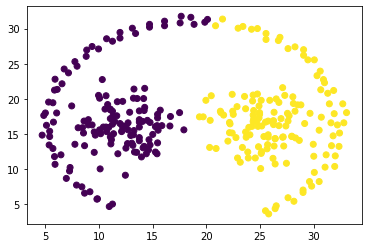

In [98]:
plt.scatter(X[0], X[1], c=spectral_pred)

In [100]:
data = pd.read_csv('D:\Moradkhani\datasets\spiral.txt', header = None, delimiter = "\t")

In [101]:
data

,0,1,2
0,31.95,7.95,3
1,31.15,7.30,3
2,30.45,6.65,3
3,29.70,6.00,3
4,28.90,5.55,3
...,...,...,...
307,15.75,13.85,2
308,15.65,14.05,2
309,15.65,14.25,2
310,15.65,14.50,2


In [102]:
X = data[[0,1]]

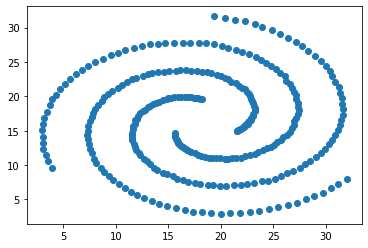

In [103]:
plt.scatter(X[0], X[1])

In [108]:
spectral_pred = SpectralClustering(n_clusters=3, affinity = 'rbf').fit_predict(X)

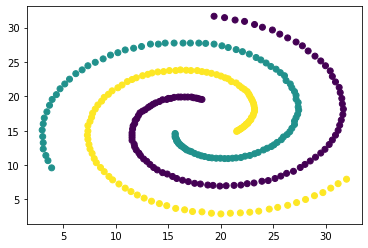

In [109]:
plt.scatter(X[0], X[1], c=spectral_pred)

In [111]:
kmeans_pred = KMeans(n_clusters=3).fit_predict(X)

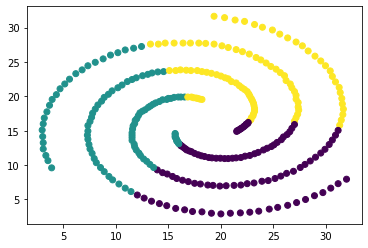

In [112]:
plt.scatter(X[0], X[1], c=kmeans_pred)

In [113]:
from sklearn.cluster import AgglomerativeClustering

In [129]:
agglomerative_pred = AgglomerativeClustering(n_clusters=3, linkage='single').fit_predict(X)

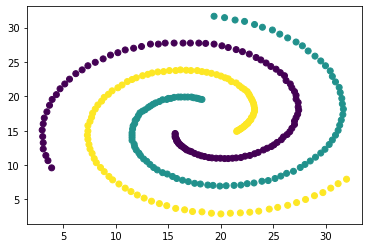

In [130]:
plt.scatter(X[0], X[1], c=agglomerative_pred)